In [12]:
from tensorflow.keras.datasets.boston_housing import load_data

(x_train, y_train),(x_test, y_test) = load_data(path='boston_housing.npz',
                                                test_split=0.2,
                                                seed = 777)

In [13]:
print(x_train.shape,x_test.shape)

(404, 13) (102, 13)


In [11]:
# import pandas as pd

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# print(train.shape,test.shape)
# print(train.head())

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split (x_train, y_train, test_size=0.33, random_state=777)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1], )))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(x_tr, y_tr,
                    epochs=500,
                    validation_data = (x_val, y_val))

model.evaluate(x_test, y_test)

Epoch 1/500
9/9 [==============================] - 0s 10ms/step - loss: 518.6436 - mae: 21.0779 - val_loss: 559.1931 - val_mae: 21.3747
Epoch 2/500
9/9 [==============================] - 0s 2ms/step - loss: 480.7231 - mae: 20.1670 - val_loss: 514.9014 - val_mae: 20.3273
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 439.0361 - mae: 19.0975 - val_loss: 464.3250 - val_mae: 19.0702
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 389.9209 - mae: 17.8226 - val_loss: 407.6263 - val_mae: 17.5594
Epoch 5/500
9/9 [==============================] - 0s 2ms/step - loss: 336.9041 - mae: 16.3450 - val_loss: 345.6932 - val_mae: 15.7550
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 278.1429 - mae: 14.6272 - val_loss: 283.1507 - val_mae: 13.8447
Epoch 7/500
9/9 [==============================] - 0s 2ms/step - loss: 220.8969 - mae: 12.7082 - val_loss: 223.4410 - val_mae: 11.8410
Epoch 8/500
9/9 [==============================] - 0s 

[14.201716423034668, 2.914262056350708]

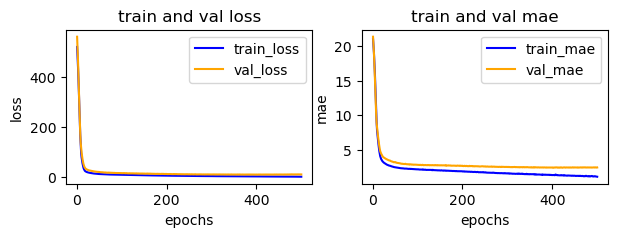

In [27]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (7, 2))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['mae']
val_acc = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()